## CS 573 Assignment 3  Survey Results
## Word Whales


In [33]:
# Import all the things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('A3 - CS573_March 3, 2022_08.15.csv')
data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,LocationLongitude,DistributionChannel,UserLanguage,Q21,Q22,Q19,Q20,,Q15,Word cloud 5
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Location Longitude,Distribution Channel,User Language,What's your major?,Can you please share your gender identity?,Which word cloud do you think was built using ...,Which word cloud do you think was built using ...,Which word cloud do you think was built using ...,Which word cloud do you think was built using ...,Which word cloud do you think was built using ...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""locationLongitude""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}","{""ImportId"":""QID24""}","{""ImportId"":""QID25""}","{""ImportId"":""QID22""}","{""ImportId"":""QID23""}","{""ImportId"":""QID14""}","{""ImportId"":""QID18""}","{""ImportId"":""QID21""}"
2,2022-02-27 15:00:45,2022-02-27 15:03:37,IP Address,68.187.220.222,100,171,True,2022-02-27 15:03:37,R_SUVNjoueIeAVUZj,NaN,...,-71.826202392578125,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-28 08:53:31,2022-02-28 08:53:59,IP Address,130.215.168.185,100,28,True,2022-02-28 08:54:00,R_yQOZdFQQmdWZ2QV,NaN,...,-71.826202392578125,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-28 08:54:02,2022-02-28 09:35:53,IP Address,130.215.168.185,100,2511,True,2022-02-28 09:35:54,R_3Ebu4IWgVXRVRkY,NaN,...,-71.826202392578125,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Clean it up a bit

# first rows are useless (either headers or blank responses)
data = data.drop([0, 1, 2, 3, 4, 5,6])
data = data.reset_index()

# get rid of useless columns
data = data.drop(['index','StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName'], axis = 1)
data = data.drop(['RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage'], axis = 1)

print(data.head())
data.shape

                Q21    Q22           Q19           Q20                \
0       Engineering    Man  Word cloud a  Word cloud c  Word cloud a   
1       Engineering  Woman  Word cloud a  Word cloud c  Word cloud a   
2     Life Sciences  Woman  Word cloud a  Word cloud c  Word cloud c   
3  Computer Science  Woman  Word cloud a  Word cloud c  Word cloud a   
4  Computer Science  Woman  Word cloud a  Word cloud c  Word cloud b   

            Q15  Word cloud 5  
0  Word cloud c  Word cloud b  
1  Word cloud c  Word cloud b  
2  Word cloud c  Word cloud b  
3  Word cloud c  Word cloud b  
4  Word cloud c  Word cloud b  


(24, 7)

In [49]:
# Check for right answers and get participant accuracy
# 1 = right answer, 0 = wrong answer

acc = []
doc1 = []
doc2 = []
doc3 = []
doc4 = []
doc5 = []
rubric = ['Word cloud a', 'Word cloud c', 'Word cloud a', 'Word cloud c', 'Word cloud b']

    
for i in range(24): ## be sure to change this based off of csv shape cuz I'm lazy
    di = data.iloc[i,]
    check = di.tolist()
        
    if rubric[0] == check[2]:
        doc1.append(1)
    elif rubric[0] != check[2]:
        doc1.append(0)
            
    if rubric[1] == check[3]:
        doc2.append(1)
    elif rubric[1] != check[3]:
        doc2.append(0)
            
    if rubric[2] == check[4]:
        doc3.append(1)
    elif rubric[2] != check[4]:
        doc3.append(0)
            
    if rubric[3] == check[5]:
        doc4.append(1)
    elif rubric[3] != check[5]:
        doc4.append(0)
            
    if rubric[4] == check[6]:
        doc5.append(1)
    elif rubric[4] != check[6]:
        doc5.append(0)
        
    acc.append( (doc1[i] + doc2[i] + doc3[i] + doc4[i] + doc5[i])/5 ) 
    
data['WC1'] = doc1
data['WC2'] = doc2
data['WC3'] = doc3
data['WC4'] = doc4
data['WC5'] = doc5
data['acc'] = acc
        
        
data.head()

,Q21,Q22,Q19,Q20,,Q15,Word cloud 5,WC1,WC2,WC3,WC4,WC5,acc
0,Engineering,Man,Word cloud a,Word cloud c,Word cloud a,Word cloud c,Word cloud b,1,1,1,1,1,1.0
1,Engineering,Woman,Word cloud a,Word cloud c,Word cloud a,Word cloud c,Word cloud b,1,1,1,1,1,1.0
2,Life Sciences,Woman,Word cloud a,Word cloud c,Word cloud c,Word cloud c,Word cloud b,1,1,0,1,1,0.8
3,Computer Science,Woman,Word cloud a,Word cloud c,Word cloud a,Word cloud c,Word cloud b,1,1,1,1,1,1.0
4,Computer Science,Woman,Word cloud a,Word cloud c,Word cloud b,Word cloud c,Word cloud b,1,1,0,1,1,0.8


/Users/nick/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


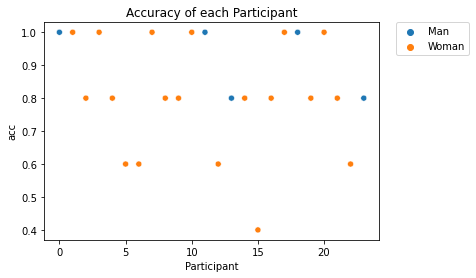

/Users/nick/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


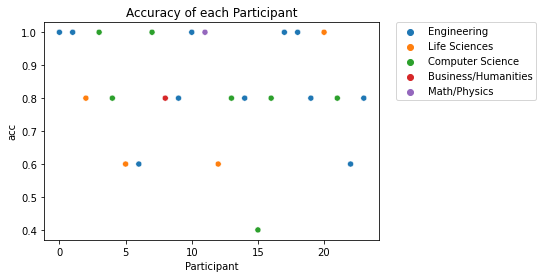

In [57]:
# Viz Time

sns.scatterplot(data.index, data['acc'], hue = data['Q22'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Accuracy of each Participant by Gender')
plt.xlabel('Participant')
plt.show()

sns.scatterplot(data.index, data['acc'], hue = data['Q21'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Accuracy of each Participant by Major')
plt.xlabel('Participant')
plt.show()

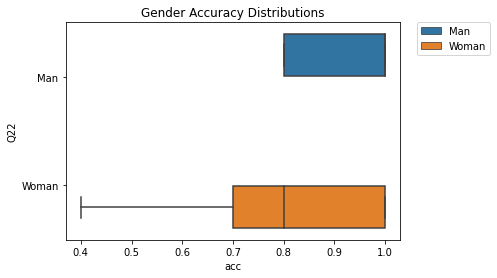

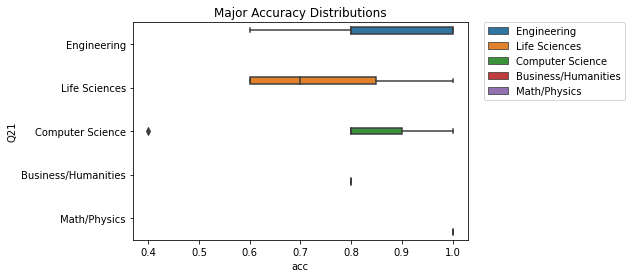

In [64]:
sns.boxplot(x = 'acc', y = 'Q22', data = data, hue = 'Q22', orient = 'h')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Gender Accuracy Distributions')
plt.show()


sns.boxplot(x = 'acc', y = 'Q21', data = data, hue = 'Q21', orient = 'h')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Major Accuracy Distributions')
plt.show()

In [67]:
# Calc each word cloud acc
wcacc = []

wc1 = data['WC1'].tolist()
wcacc.append( (sum(wc1))/len(wc1) ) 


wc2 = data['WC2'].tolist()
wcacc.append( (sum(wc2))/len(wc2) ) 


wc3 = data['WC3'].tolist()
wcacc.append( (sum(wc3))/len(wc3) ) 


wc4 = data['WC4'].tolist()
wcacc.append( (sum(wc4))/len(wc4) ) 

wc5 = data['WC5'].tolist()
wcacc.append( (sum(wc5))/len(wc5) ) 

WC = ['Text 1', 'Text 2', 'Text 3', 'Text 4', 'Text 5']

Text(0.5, 1.0, 'Accuracy of Participants per Text')

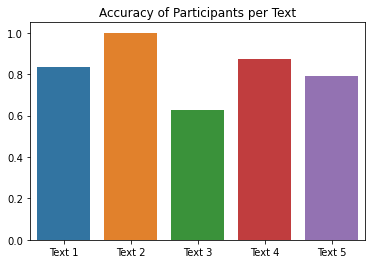

In [69]:
sns.barplot(x = WC, y = wcacc)
plt.title('Accuracy of Participants per Text')

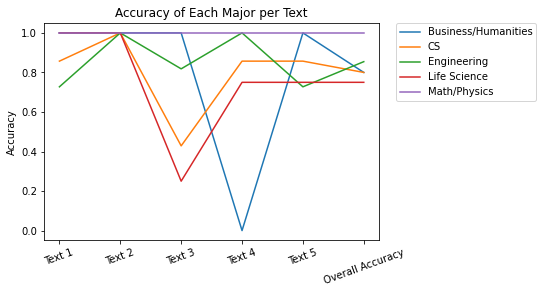

In [89]:
# Plot question accuracy within majors
majors = data.groupby(['Q21']).mean()

for x in range(5):
    b = majors.iloc[0,].tolist()
    c = majors.iloc[1,].tolist()
    e = majors.iloc[2,].tolist()
    l = majors.iloc[3,].tolist()
    m = majors.iloc[4,].tolist()
    
WC = ['Text 1', 'Text 2', 'Text 3', 'Text 4', 'Text 5', 'Overall Accuracy']

plt.plot(b,label ='Business/Humanities' )
plt.plot(c, label ='CS')
plt.plot(e , label ='Engineering')
plt.plot( l, label = 'Life Science')
plt.plot(m, label = 'Math/Physics')
plt.legend()
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5], WC, rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Accuracy of Each Major per Text')

plt.show()